### Model Sentimen 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def map_sentiment(sentiment):
    if sentiment == 1:
        return 'positif'
    elif sentiment == 0:
        return 'netral'
    else:
        return 'negatif'

In [3]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3, random_state=42):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=test_data_proportion,
                                                        random_state=random_state)
    return train_X, test_X, train_Y, test_Y

In [4]:
def tfidf_extractor(corpus, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [5]:
def plot_training_model_loss(clf, iterations, X, y):
    losses = []
    for i in range(iterations):
        clf.partial_fit(X, y, classes=np.unique(y))
        decision = clf.decision_function(X)
        hinge_loss = np.mean(np.maximum(0, 1 - decision[np.arange(len(y)), y]))
        losses.append(hinge_loss)
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), losses, label='Training Loss')
    plt.title('Training Model')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
df = pd.read_csv('preprocessed_sentiment_500.csv')
df['sentimen'] = df['sentimen'].map(map_sentiment)
df.head(10)

,content,sentimen
0,aksi perundungan bullying siswa smp masjid bal...,negatif
1,anies baswedan peringkat ketiga hasil survei a...,netral
2,yunita sari anggraini 20 terdakwa pencabulan 1...,netral
3,yenny wahid mendukung prabowo subianto ganjar ...,netral
4,yunita sari anggraini 20 terdakwa pencabulan 1...,netral
5,aksi kawanan maling bobol rumah makan wilayah ...,negatif
6,anies baswedan muhaimin iskandar menyambangi k...,netral
7,anies baswedan muhaimin iskandar cak imin dija...,netral
8,anies baswedan muhaimin iskandar cak imin diar...,netral
9,anies baswedan muhaimin iskandar amin resmi me...,netral


In [7]:
# Split data
x_train, x_test, y_train, y_test = prepare_datasets(df['content'], df['sentimen'], test_data_proportion=0.3)

In [8]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure the lengths match after splitting
y_train_encoded = y_train_encoded[:len(x_train)]
y_test_encoded = y_test_encoded[:len(x_test)]

In [9]:
# TF-IDF Vectorization
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

In [10]:
print("Shape of tfidf_train_features:", tfidf_train_features.shape)
print("Length of y_train_encoded:", len(y_train_encoded))

Shape of tfidf_train_features: (364, 46545)
Length of y_train_encoded: 364


In [11]:
print("Shape of tfidf_test_features:", tfidf_test_features.shape)
print("Length of y_test_encoded:", len(y_test_encoded))

Shape of tfidf_test_features: (156, 46545)
Length of y_test_encoded: 156


In [12]:
# Model training with specified number of iterations
clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
clf.partial_fit(tfidf_train_features, y_train_encoded, classes=np.unique(y_train_encoded))

SGDClassifier()

In [13]:
# Predictions
clf_pred = clf.predict(tfidf_test_features)

# Accuracy
clf_accuracy = accuracy_score(y_test_encoded, clf_pred)
print("Accuracy:", clf_accuracy)

Accuracy: 0.6794871794871795


In [14]:
# Classification Report
report = classification_report(y_test_encoded, clf_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     negatif       0.45      0.32      0.38        31
      netral       0.78      0.84      0.81        95
     positif       0.52      0.53      0.52        30

    accuracy                           0.68       156
   macro avg       0.58      0.57      0.57       156
weighted avg       0.66      0.68      0.67       156



<Figure size 800x600 with 0 Axes>

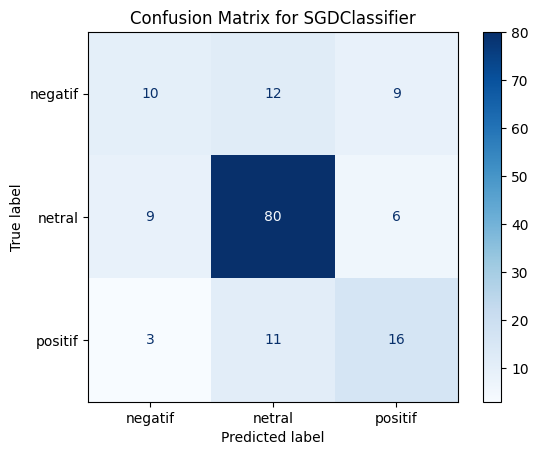

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, clf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SGDClassifier')
plt.show()

## Naiye Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_features, y_train_encoded)

MultinomialNB()

In [18]:
# Predictions
nb_pred = nb_classifier.predict(tfidf_test_features)

# Accuracy
nb_accuracy = accuracy_score(y_test_encoded, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.6089743589743589


In [19]:
# Classification Report
nb_report = classification_report(y_test_encoded, nb_pred, target_names=label_encoder.classes_)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        31
      netral       0.61      1.00      0.76        95
     positif       0.00      0.00      0.00        30

    accuracy                           0.61       156
   macro avg       0.20      0.33      0.25       156
weighted avg       0.37      0.61      0.46       156



/home/krisna/ProjectTA/model_ta/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/krisna/ProjectTA/model_ta/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/krisna/ProjectTA/model_ta/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

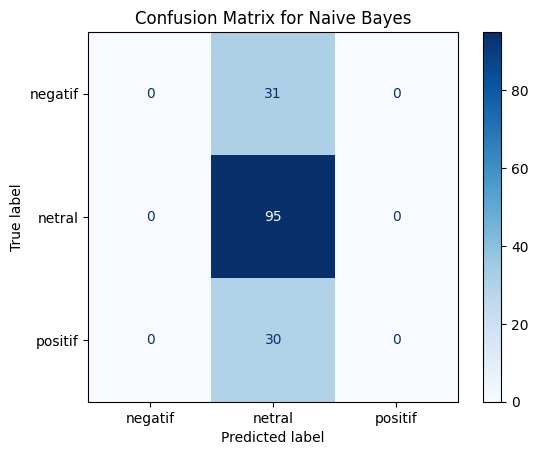

In [20]:
# Plot confusion matrix
nb_confusion_matrix = confusion_matrix(y_test_encoded, nb_pred)
nb_display = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=label_encoder.classes_)
nb_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

## SVM

In [21]:
from sklearn.svm import SVC

In [22]:
# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(tfidf_train_features, y_train_encoded)


SVC(kernel='linear')

In [23]:
# Predictions
svm_pred = svm_classifier.predict(tfidf_test_features)

# Accuracy
svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6602564102564102


In [24]:
# Classification Report
svm_report = classification_report(y_test_encoded, svm_pred, target_names=label_encoder.classes_)
print("SVM Classification Report:\n", svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

     negatif       0.50      0.13      0.21        31
      netral       0.67      0.95      0.79        95
     positif       0.64      0.30      0.41        30

    accuracy                           0.66       156
   macro avg       0.60      0.46      0.47       156
weighted avg       0.63      0.66      0.60       156



<Figure size 800x600 with 0 Axes>

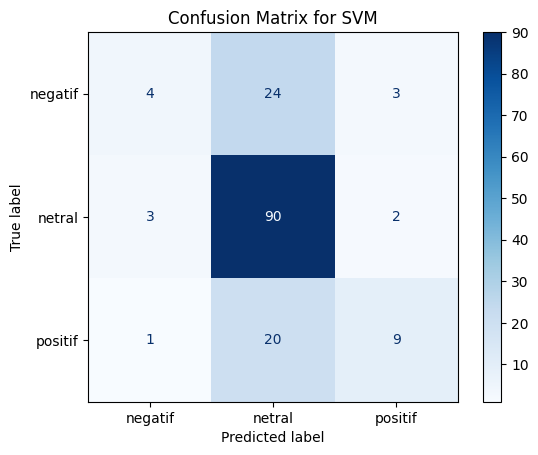

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test_encoded, svm_pred)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix, display_labels=label_encoder.classes_)
svm_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

In [27]:
# Initialize SVM classifier
svm_classifier_tuned = SVC()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=svm_classifier_tuned, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search to the data
grid_search.fit(tfidf_train_features, y_train_encoded)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Parameters: {'C': 10, 'kernel': 'linear'}


In [28]:
# Predictions using best model
svm_pred_tuned = grid_search.best_estimator_.predict(tfidf_test_features)

# Accuracy after tuning
svm_accuracy_tuned = accuracy_score(y_test_encoded, svm_pred_tuned)
print("SVM Accuracy after tuning:", svm_accuracy_tuned)

SVM Accuracy after tuning: 0.6730769230769231


In [29]:
# Classification report after tuning
svm_report_tuned = classification_report(y_test_encoded, svm_pred_tuned, target_names=label_encoder.classes_)
print("SVM Classification Report after tuning:\n", svm_report_tuned)

SVM Classification Report after tuning:
               precision    recall  f1-score   support

     negatif       0.44      0.26      0.33        31
      netral       0.72      0.89      0.80        95
     positif       0.60      0.40      0.48        30

    accuracy                           0.67       156
   macro avg       0.59      0.52      0.53       156
weighted avg       0.64      0.67      0.64       156



<Figure size 800x600 with 0 Axes>

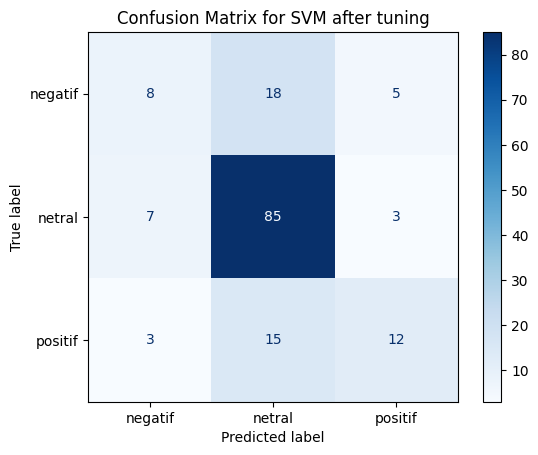

In [30]:
# Confusion matrix after tuning
svm_confusion_matrix_tuned = confusion_matrix(y_test_encoded, svm_pred_tuned)

# Plot confusion matrix after tuning
plt.figure(figsize=(8, 6))
svm_disp_tuned = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix_tuned, display_labels=label_encoder.classes_)
svm_disp_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM after tuning')
plt.show()

ensambel 

In [31]:
from sklearn.ensemble import VotingClassifier

# Define multiple SVM models with different parameters
svm_model1 = SVC(kernel='linear', C=0.1)
svm_model2 = SVC(kernel='rbf', C=1, gamma='scale')
svm_model3 = SVC(kernel='poly', degree=3, C=10)

In [32]:
# Ensemble Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('svm_linear', svm_model1),
    ('svm_rbf', svm_model2),
    ('svm_poly', svm_model3)
], voting='hard')  # Use 'hard' voting for class label

In [33]:
# Fit ensemble model
ensemble_classifier.fit(tfidf_train_features, y_train_encoded)

# Predictions
ensemble_pred = ensemble_classifier.predict(tfidf_test_features)

# Accuracy
ensemble_accuracy = accuracy_score(y_test_encoded, ensemble_pred)
print("Ensemble Learning Accuracy:", ensemble_accuracy)

Ensemble Learning Accuracy: 0.6346153846153846
